In [2]:
import sys
sys.path.append("../")

from utility.animations import *
from utility.plotting import *

PATH = "../data"
SAVE_PATH = "../plots"

saved animation as ../plots/force_field_0_0_wave_animation.gif
saved animation as ../plots/force_field_0_0_angular_animation.gif
saved animation as ../plots/force_field_0_0_polar_animation.gif


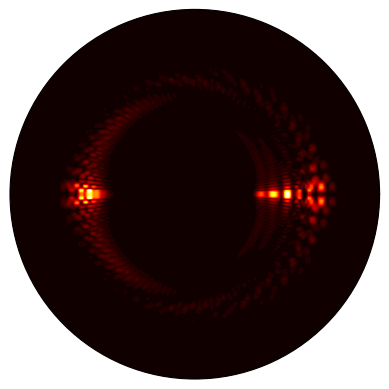

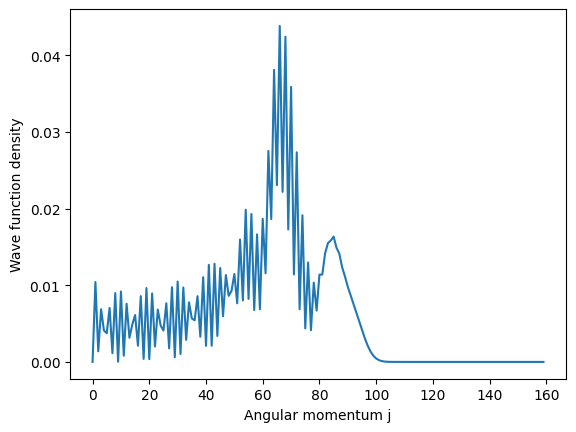

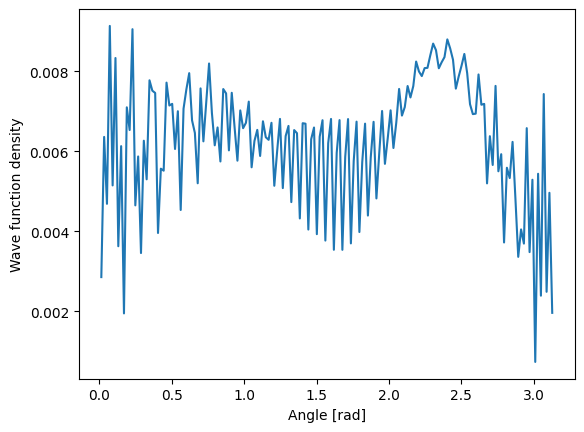

In [3]:
animator = Animator(PATH, "force_field_0_0", SAVE_PATH, "force_field_0_0")

animator.wave_2d_animation()
animator.angular_animation()
animator.polar_animation()

saved animation as ../plots/force_field_1_0_wave_animation.gif
saved animation as ../plots/force_field_1_0_angular_animation.gif
saved animation as ../plots/force_field_1_0_polar_animation.gif


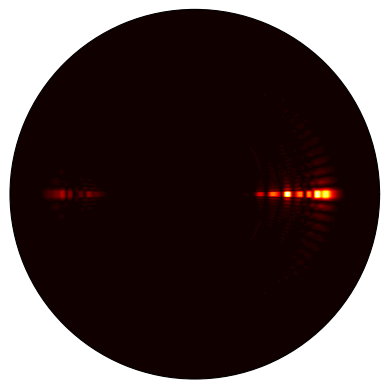

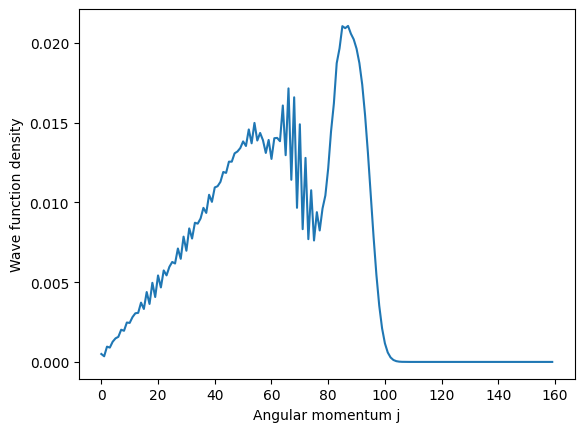

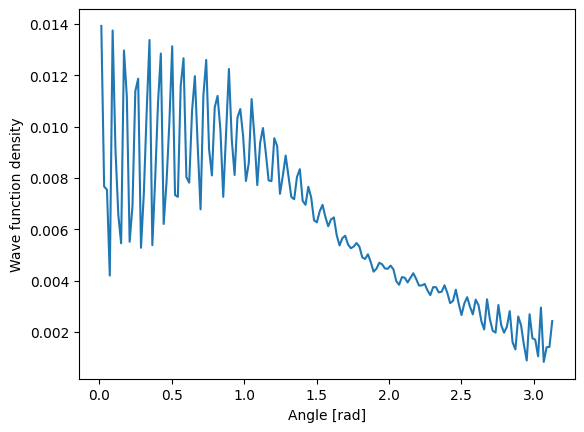

In [4]:
animator = Animator(PATH, "force_field_1_0", SAVE_PATH, "force_field_1_0")

animator.wave_2d_animation()
animator.angular_animation()
animator.polar_animation()

saved animation as ../plots/force_field_1_1_wave_animation.gif
saved animation as ../plots/force_field_1_1_angular_animation.gif
saved animation as ../plots/force_field_1_1_polar_animation.gif


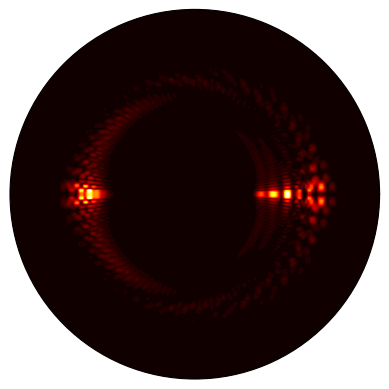

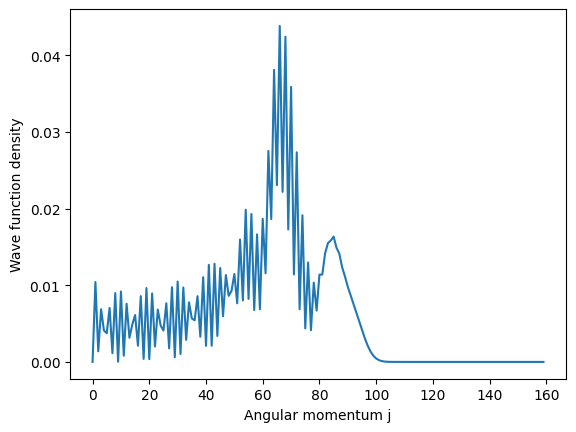

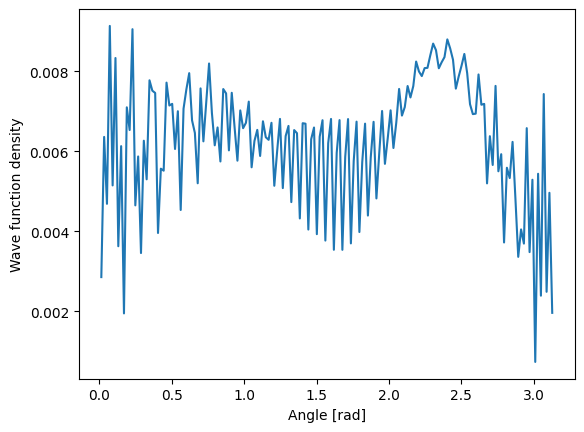

In [6]:
animator = Animator(PATH, "force_field_1_1", SAVE_PATH, "force_field_1_1")

animator.wave_2d_animation()
animator.angular_animation()
animator.polar_animation()

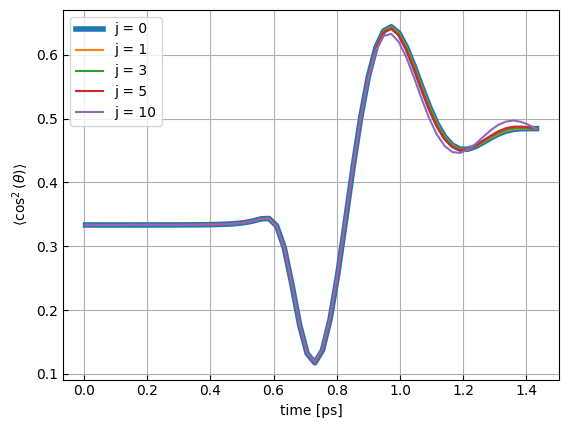

In [7]:
alignments = AlignmentPlot(PATH)

fig, ax = alignments.plot_series(
    alignments.single_j("force_field", 0),
    alignments.single_j("force_field", 1),
    alignments.single_j("force_field", 3),
    alignments.single_j("force_field", 5),
    alignments.single_j("force_field", 10),
)

ax.lines[0].set_linewidth(4)
ax.legend(["j = 0", "j = 1", "j = 3", "j = 5", "j = 10"])

fig.savefig(f"{SAVE_PATH}/force_field_alignment.pdf")

# Potential scaling

In [4]:
def scaling_alignments(prefix: str):
    for scaling in [0.2, 0.5, 2, 5]:
        fig, ax = alignments.plot_series(
            alignments.single_j(f"{prefix}_{scaling}", 0),
            alignments.single_j(f"{prefix}_{scaling}", 1),
            alignments.single_j(f"{prefix}_{scaling}", 5)
        )

        ax.lines[0].set_linewidth(4)
        ax.legend(["j = 0", "j = 1", "j = 5"])
        fig.savefig(f"{SAVE_PATH}/{prefix}_{scaling}_alignment.pdf")

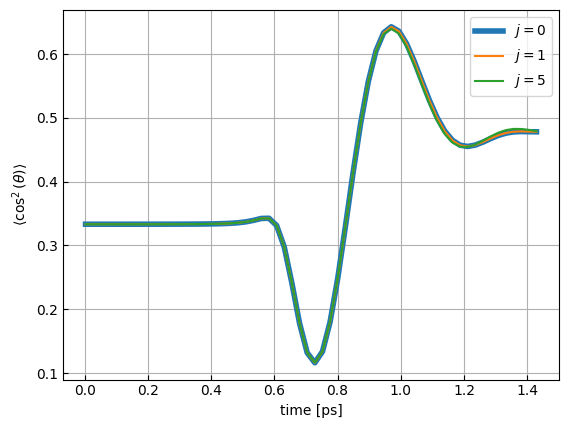

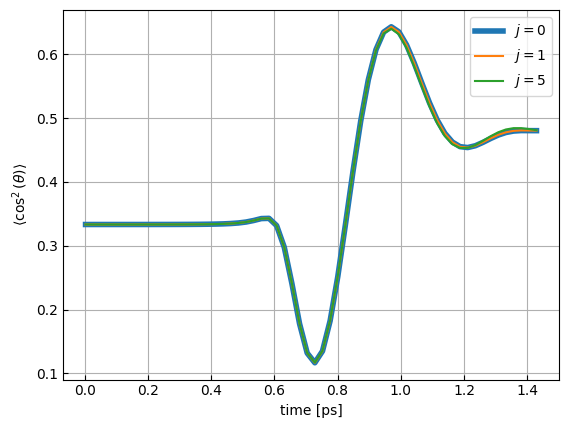

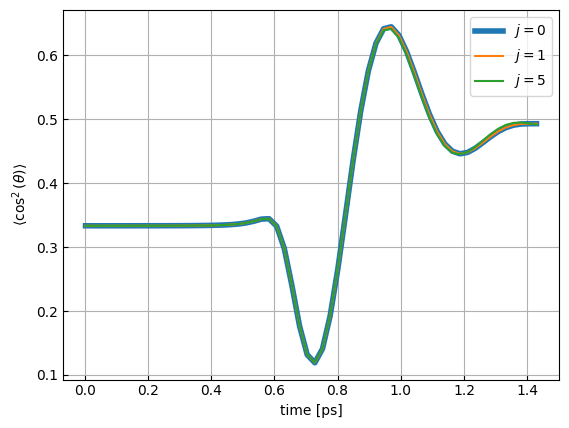

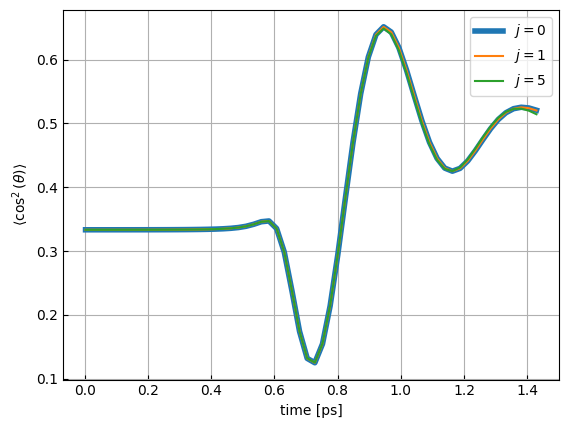

In [5]:
scaling_alignments("dipole_scaling")

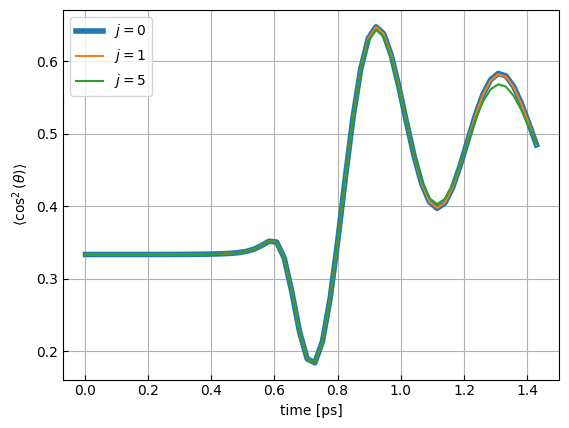

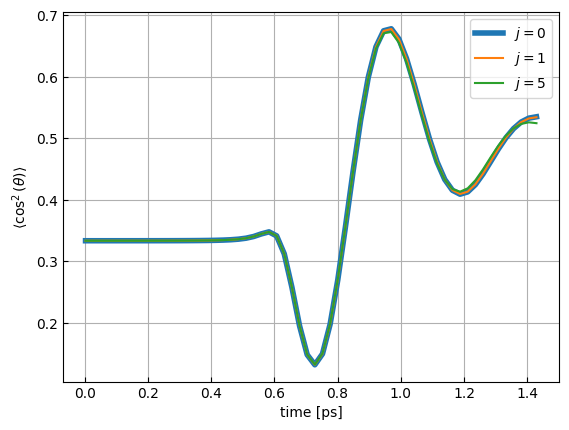

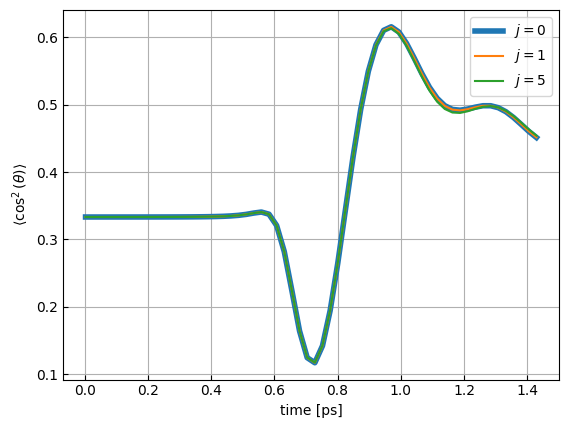

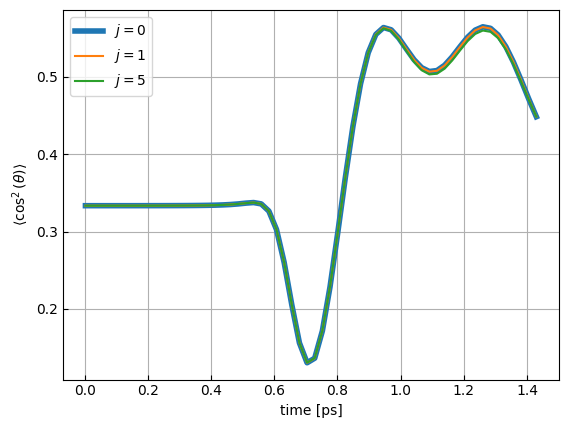

In [6]:
scaling_alignments("rep_o_scaling")

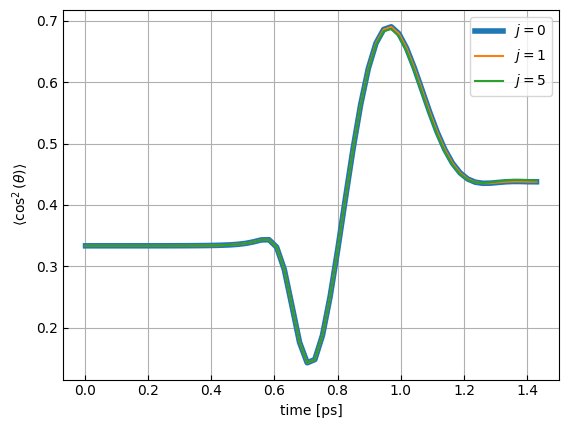

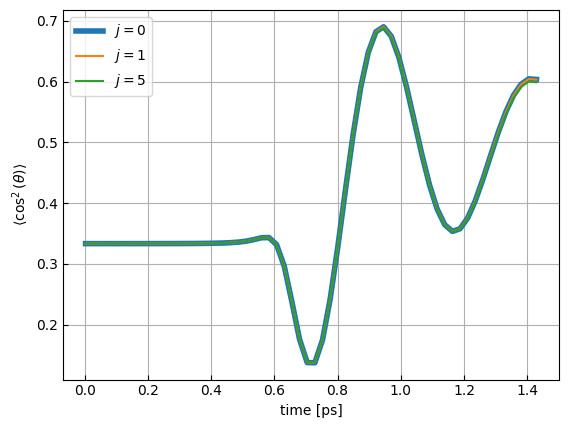

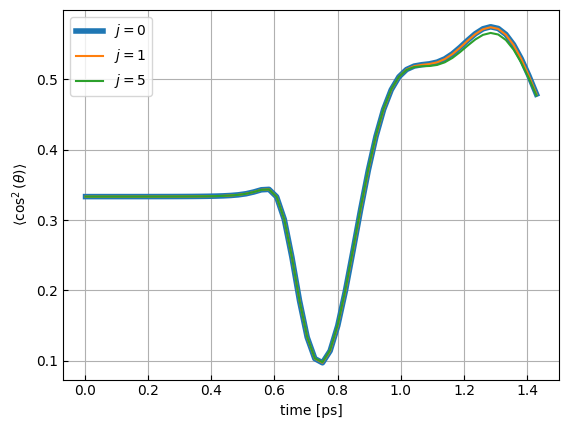

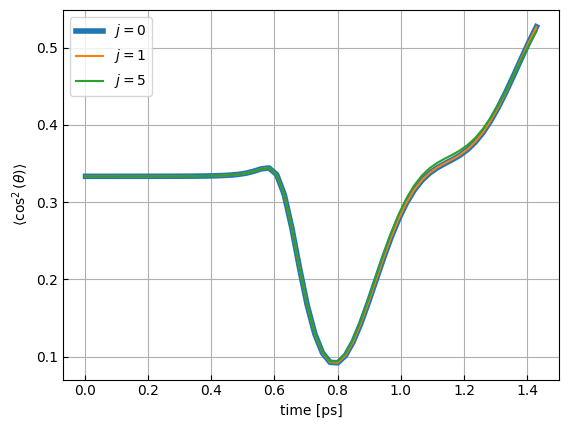

In [7]:
scaling_alignments("rep_c_scaling")

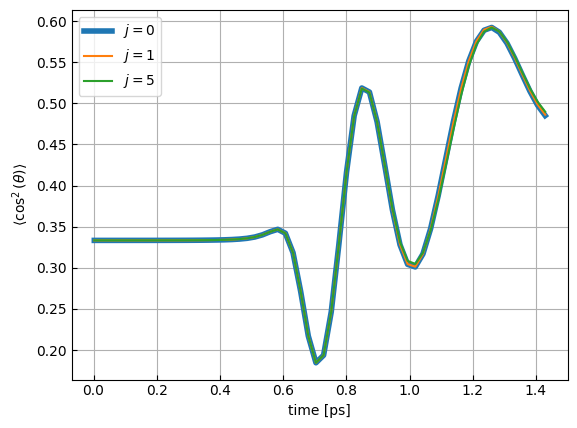

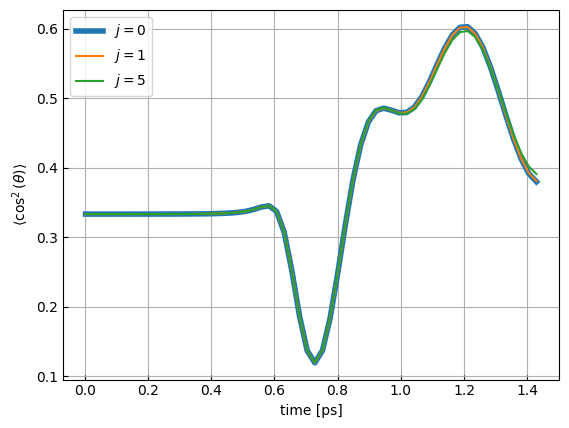

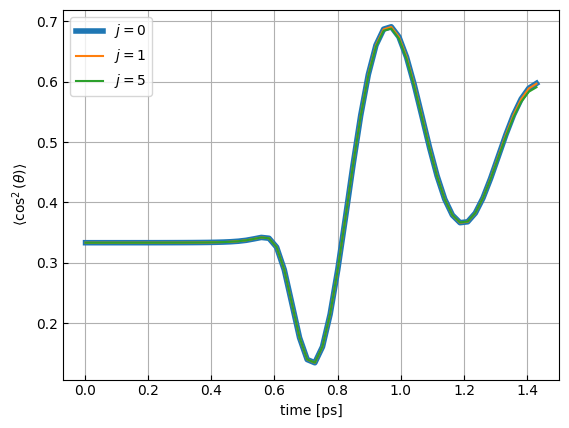

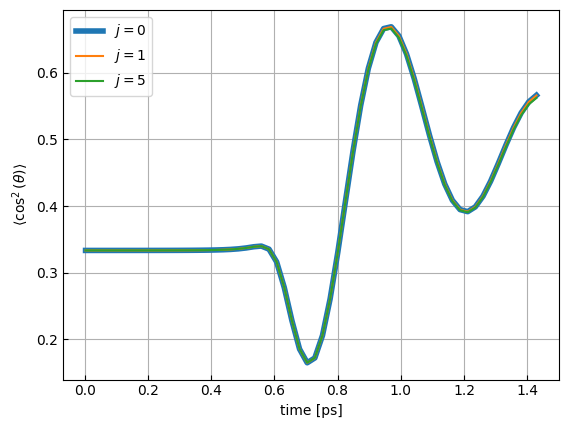

In [8]:
scaling_alignments("rep_s_scaling")

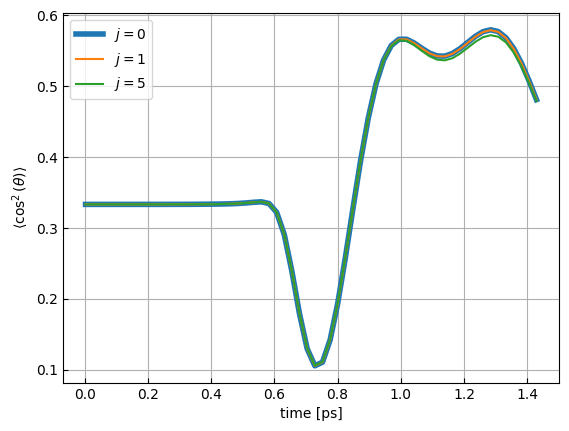

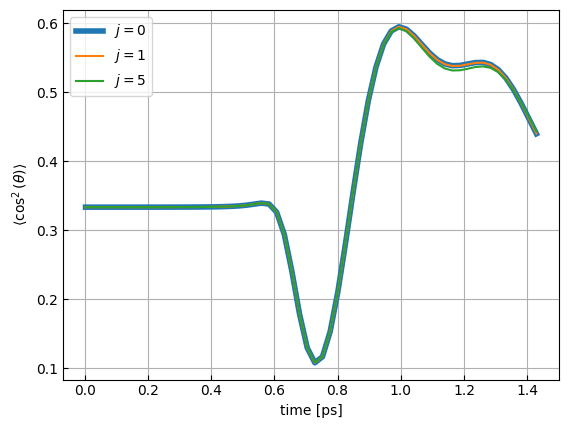

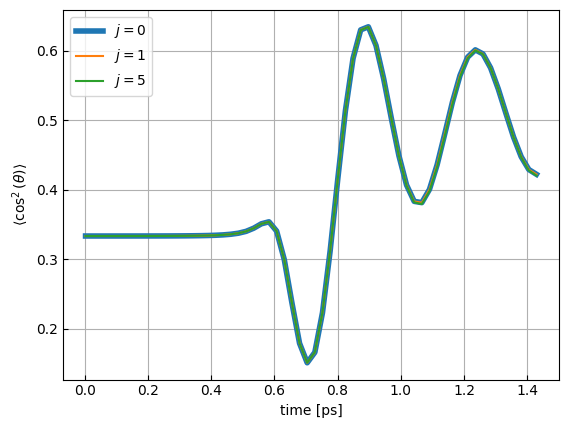

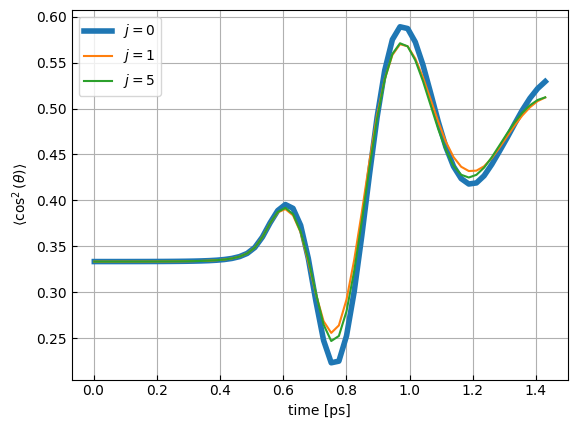

In [9]:
scaling_alignments("attr_o_scaling")

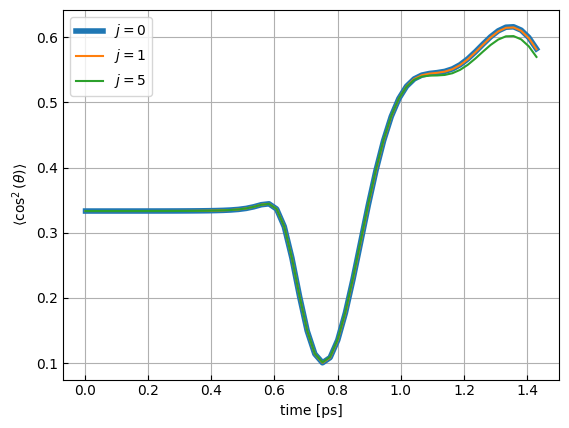

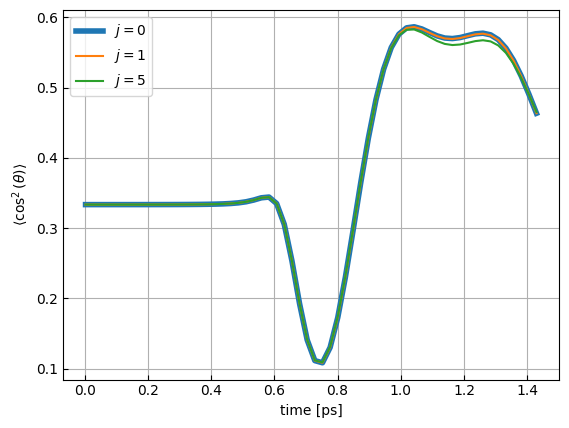

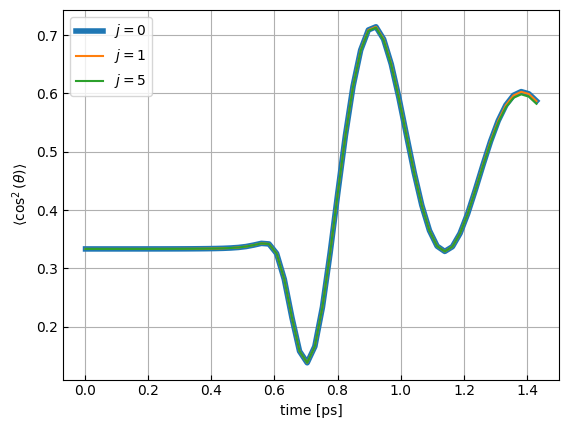

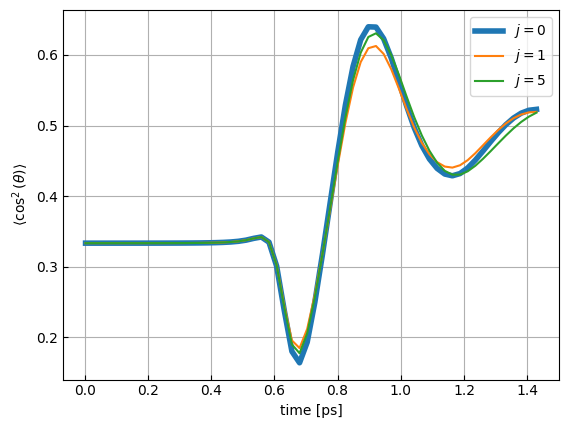

In [10]:
scaling_alignments("attr_c_scaling")

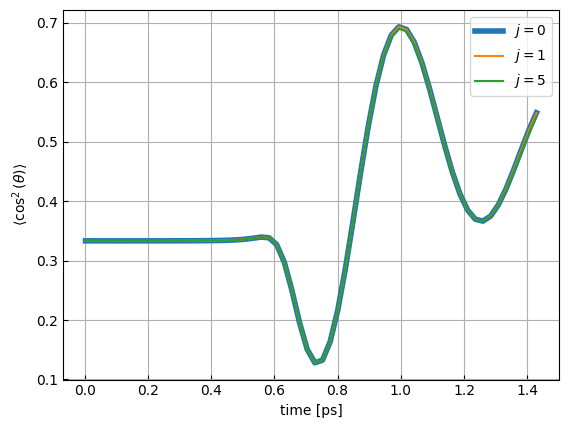

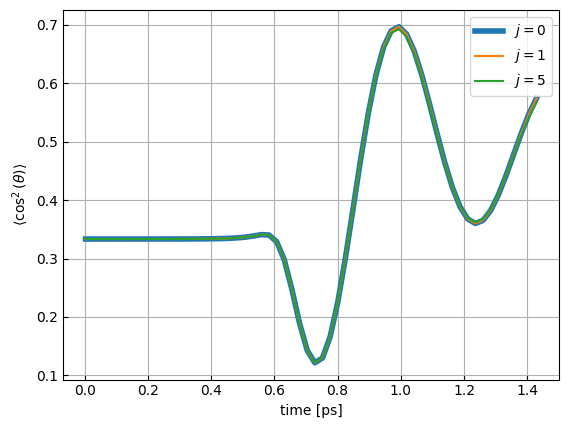

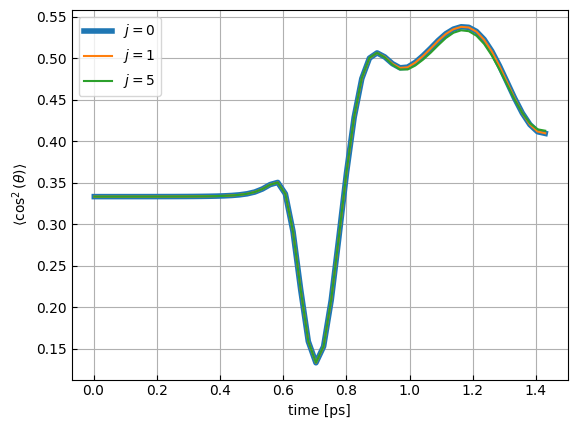

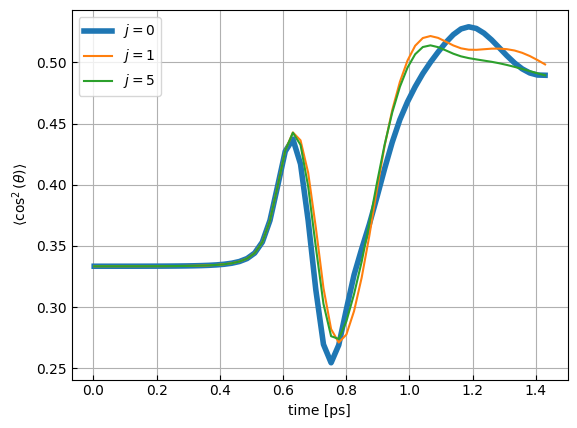

In [11]:
scaling_alignments("attr_s_scaling")

Reaction rate for j = 0, Ω = 0

In [8]:
from utility.reaction_rate_calc import *
energy_kelvin = 3700

j_init = 0
omega_init = 0

j_init = 0
omega_init = 0

losses = Losses(PATH, f"ff_losses_{energy_kelvin}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_0 = losses.get_reaction(Ionization.Penning, energy_kelvin * KELVIN)
di_reaction_0 = losses.get_reaction(Ionization.Dissociative, energy_kelvin * KELVIN)

print(f"Penning reaction rate: {pi_reaction_0.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_0.reaction_rate:.4}")

XPi reaction rate:  7.895602922190536e-10
A + B reaction rate:  7.895602922190536e-10


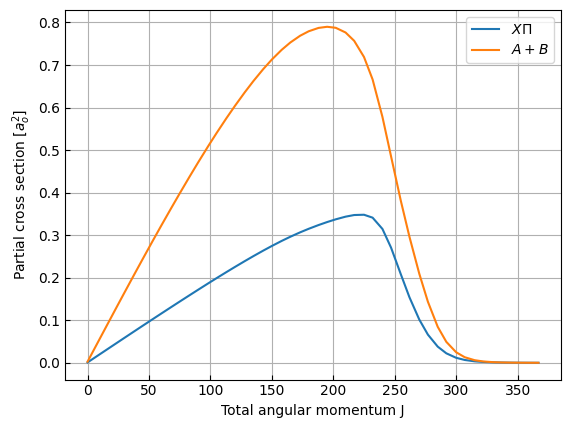

In [9]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_0.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_0.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

Reaction rate for j = 1, Ω = 0

In [10]:
j_init = 1
omega_init = 0

losses = Losses(PATH, f"ff_losses_{energy_kelvin}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_1_0 = losses.get_reaction(Ionization.Penning, energy_kelvin * KELVIN)
di_reaction_1_0 = losses.get_reaction(Ionization.Dissociative, energy_kelvin * KELVIN)

print(f"Penning reaction rate: {pi_reaction_1_0.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_1_0.reaction_rate:.4}")

XPi reaction rate:  2.59631989683955e-10
A + B reaction rate:  2.59631989683955e-10


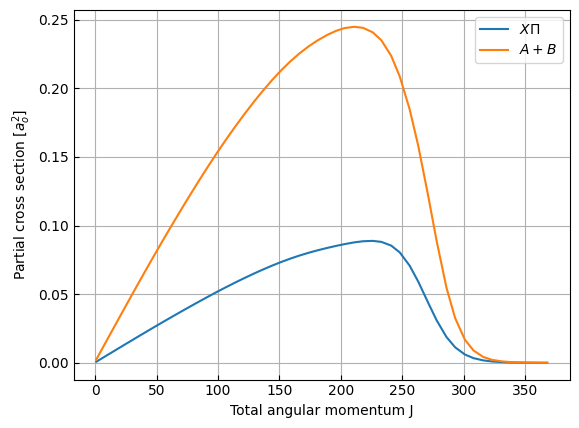

In [11]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1_0.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1_0.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

Reaction rate for j = 1, Ω = 1

In [12]:
j_init = 1
omega_init = 1

losses = Losses(PATH, f"ff_losses_{energy_kelvin}_{j_init}_{omega_init}.dat", j_init, omega_init)
pi_reaction_1_1 = losses.get_reaction(Ionization.Penning, energy_kelvin * KELVIN)
di_reaction_1_1 = losses.get_reaction(Ionization.Dissociative, energy_kelvin * KELVIN)

print(f"Penning reaction rate: {pi_reaction_1_1.reaction_rate:.4}")
print(f"Dissociative reaction rate: {di_reaction_1_1.reaction_rate:.4}")

XPi reaction rate:  5.298952563999207e-10
A + B reaction rate:  5.298952563999207e-10


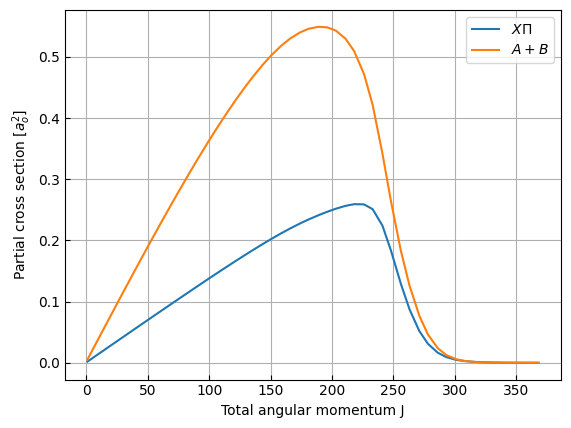

In [13]:
fig, ax = plot()

ax.plot(losses.j_tot_values, pi_reaction_1_1.partial_cross_sections, label = r"$X \Pi$")
ax.plot(losses.j_tot_values, di_reaction_1_1.partial_cross_sections, label = "$A + B$")
ax.set_xlabel("Total angular momentum J")
ax.set_ylabel("Partial cross section [$a_o^2$]")
ax.legend();

Full reaction rates

In [14]:
pi_rate_0 = pi_reaction_0.reaction_rate
pi_rate_1 = pi_reaction_1_0.reaction_rate + pi_reaction_1_1.reaction_rate

di_rate_0 = di_reaction_0.reaction_rate
di_rate_1 = di_reaction_1_0.reaction_rate + di_reaction_1_1.reaction_rate

print(f"Total reaction rate for j=0:")
print(f"Penning ionization: {pi_rate_0:.4}")
print(f"Dissociative ionization: {di_rate_0:.4}")
print()
print(f"Total reaction rate for j=1:")
print(f"Penning ionization: {pi_rate_1:.4}")
print(f"Dissociative ionization: {di_rate_1:.4}")
print()
print(f"Ratios j=1 to j=0:")
print(f"Penning ionization: {pi_rate_1/pi_rate_0}")
print(f"Dissociative ionization: {di_rate_1/di_rate_0}")

Total reaction rate for j=0:
xpi: 3.282835238713971e-10
A+B: 7.895602922190536e-10

Total reaction rate for j=1:
xpi: 3.2827034014612043e-10
A+B: 7.895272460838757e-10

Ratios j=1 to j=0:
xpi: 0.9999598404296347
A+B: 0.9999581461536206
